In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
import math
from sympy import Point,Line

In [2]:
data = np.array(pd.read_csv('~/DataSet3/1.csv'))

In [3]:
data1=data[:,1:4]
labels = data[:,-1]
labels

array([1., 1., 1., ..., 7., 7., 0.])

**Scalling data to normalize the effect of each dimention and also reduce effect of outliers**

In [6]:
scaler = StandardScaler()
scaler.fit(data1)
sample = scaler.transform(data1)
print(scaler.mean_)

[1910.67337231 2380.28738462 2041.21414154]


**Elbow Implimentation with Root Mean Squared Standered Deviation**

In [7]:
RMSSTD={}
K = range(2,11)
for k in K :
    RMSSTD[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    for i in range(0,k):
        cluster_datapoints = pd.DataFrame(sample[labels==i])
        #print(cluster_datapoints.head())
        
        #Mean Value of each dimention of datapoints in this cluster
        cluster_mean = cluster_datapoints.mean(axis=0)
        print("Cluster Mean= "+str(cluster_mean))
        
        for index,row in cluster_datapoints.iterrows():
            err = cdist(row[np.newaxis,:],cluster_mean[np.newaxis,:], 'minkowski',p=2)
            RMSSTD[k]=RMSSTD[k]+err
    #Calculate the mean error for entire dataset
    RMSSTD[k]=((RMSSTD[k]/len(sample))[0])[0]
    print("RMSSTD = "+str(RMSSTD))

Cluster Mean= 0    1.174946
1   -0.202737
2    1.250414
dtype: float64
Cluster Mean= 0   -0.488704
1    0.084326
2   -0.520093
dtype: float64
RMSSTD = {2: 0.9427559834981563}
Cluster Mean= 0   -1.464350
1    3.069569
2    0.271996
dtype: float64
Cluster Mean= 0   -0.405310
1   -0.146013
2   -0.562000
dtype: float64
Cluster Mean= 0    1.200547
1   -0.192607
2    1.264552
dtype: float64
RMSSTD = {2: 0.9427559834981563, 3: 0.8521823477590977}
Cluster Mean= 0    1.230810
1   -0.135660
2    1.272767
dtype: float64
Cluster Mean= 0   -0.373574
1    0.079010
2   -0.624010
dtype: float64
Cluster Mean= 0   -1.485224
1    3.135106
2    0.285258
dtype: float64
Cluster Mean= 0   -0.578779
1   -1.869531
2    0.039070
dtype: float64
RMSSTD = {2: 0.9427559834981563, 3: 0.8521823477590977, 4: 0.7385672907617616}
Cluster Mean= 0   -0.490896
1   -2.068830
2   -0.104629
dtype: float64
Cluster Mean= 0    1.399502
1   -0.160472
2    1.317156
dtype: float64
Cluster Mean= 0   -0.366617
1    0.073311
2   -0.81

In [8]:
SSE_array=[]
slope=[]
for key,value in RMSSTD.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,9):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
slope

[0.9427559834981563, 0.8521823477590977, 0.7385672907617616, 0.6440396276057655, 0.5814770766617315, 0.5647456347434593, 0.5600284083504513, 0.5363162593039611, 0.5229304636460335]


[[2, -0.09057363573905852],
 [3, -0.1136150569973361],
 [4, -0.09452766315599614],
 [5, -0.06256255094403396],
 [6, -0.01673144191827225],
 [7, -0.004717226393007978],
 [8, -0.023712149046490216],
 [9, -0.013385795657927635]]

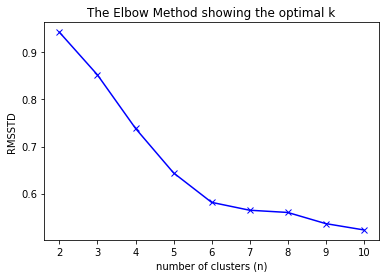

In [9]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('number of clusters (n)')
plt.ylabel('RMSSTD')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [10]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 1
Optimal Number of Clusters = 6


In [11]:
distances=[]
for i in range(0,9):
    p1=Point(2,SSE_array[0])
    p2=Point(10,SSE_array[8])
    l1 = Line(p1,p2)
    p=Point(i+2,SSE_array[i])
    l2=l1.perpendicular_segment(p)
    distances.append(l2.length)
index=distances.index(np.max(distances))
print('Optimal number 0f clusters = '+str(index+2))

Optimal number 0f clusters = 6
